# Statistics of small outbreaks

We now study the statitistics of final sizes of outbreaks for both SIS and SIR models.

We use the same Gillespie simulations algorithms as in the previous section, but take them from the package of tools included with this text.




## SIR simulations

For the SIR case, we plot the probability distribution of the total number of infections to occur $R(\infty)$.  We show how these depend on the total population size $N$.  


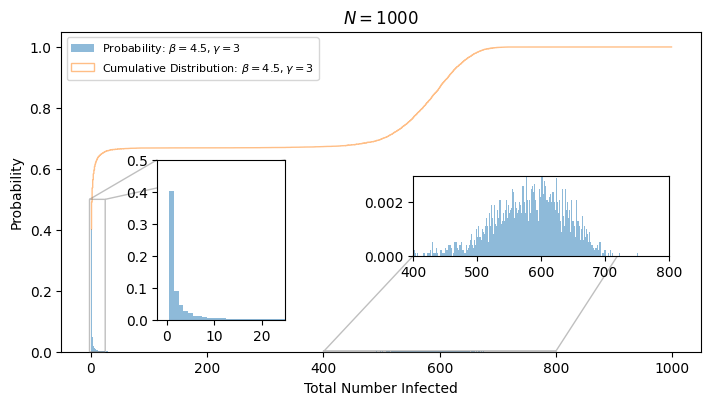

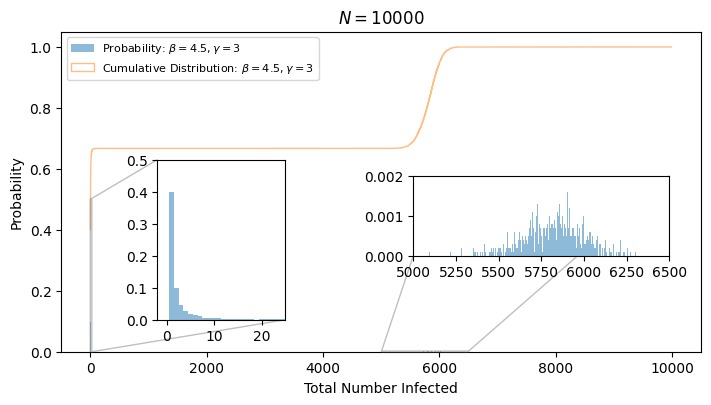

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from AMSI_2026_PGF_tools import Gillespie_SIR_model

def simulate_and_plot_SIR_final_size(N, R0=1.5, gammas=(3,), numsims = 10000, xlim1 = (-2,25), xlim2 = (400,750), ylim1=(0,0.5), ylim2 = (0,0.003)):

    fig = plt.figure(figsize = (8,4))
    mainax = fig.add_axes([0.1,0.1,0.8,0.8])
    inset_ax1 = mainax.inset_axes([0.15,0.1,0.2,0.5], xlim=xlim1, ylim=ylim1)
    inset_ax2 = mainax.inset_axes([0.55,0.3,0.4,0.25], xlim=xlim2, ylim=ylim2)

    for gamma in gammas:
        beta = R0 * gamma
        I0 = 1
        final_sizes = []
        for _ in range(numsims):
            t, S, I, R = Gillespie_SIR_model(N-I0, I0, 0, beta, gamma)
            final_sizes.append(R[-1])
        final_sizes = np.array(final_sizes)
        mainax.hist(final_sizes, bins=-0.5+np.arange(N+1), density=True, alpha=0.5, label=f'Probability: $\\beta={beta}, \\gamma={gamma}$')
        mainax.hist(final_sizes, bins=-0.5+np.arange(N+1), density=True, cumulative=True, alpha=0.5, histtype='step')
        inset_ax2.hist(final_sizes, bins = -0.5+np.arange(N+1), density=True, alpha=0.5, label=f'$\\beta={beta}, \\gamma={gamma}$')
        inset_ax1.hist(final_sizes, bins = -0.5+np.arange(N+1), density=True, alpha=0.5, label=f'$\\beta={beta}, \\gamma={gamma}$')


        #modifying cumulative dist plot followinghttps://stackoverflow.com/a/50711003/2966723
        poly = mainax.findobj(plt.Polygon)[-1] 
        vertices = poly.get_path().vertices

        # Keep everything above y == 0. You can define this mask however
        # you need, if you want to be more careful in your selection.
        keep = vertices[:, 1] > 0

        # Construct new polygon from these "good" vertices
        new_poly = plt.Polygon(vertices[keep], closed=False, fill=False,
                               edgecolor=poly.get_edgecolor(),
                               linewidth=poly.get_linewidth(), 
                               label = f'Cumulative Distribution: $\\beta={beta}, \\gamma={gamma}$')
        poly.set_visible(False)
        mainax.add_artist(new_poly)
        plt.draw()
    mainax.indicate_inset_zoom(inset_ax1)
    mainax.indicate_inset_zoom(inset_ax2)
    plt.xlabel('Total Number Infected')
    plt.ylabel('Probability')
    plt.legend(loc='upper left', fontsize=8)
    plt.title('$N={}$'.format(N))

simulate_and_plot_SIR_final_size(1000, numsims = 10000)
simulate_and_plot_SIR_final_size(10000, numsims = 10000, xlim2=(5000,6500), ylim2=(0,0.002))



- We see that small outbreaks appear to have the same distribution regardless of $N$.
- Epidemics however seem to affect the same proportion of the population for different $N$.  The distribution of the proportion infected grows tighter around the average as $N$ increases.  

## SIS Simulations

Now we look at SIS.  

### Distribution of number infected $I(t)$ at large time

We do not plot the total number of infections because at large time, the epidemics do not die out, so the number of infections continually grows.

Instead, we plot the value of $I(t)$ at the stopping time ($t=20$).  We use the same parameters as in the SIR case.  Small outbreaks have (almost invariably) gone extinct by this time, so either the number of infections is $0$ or it is close to the endemic equilibrium.


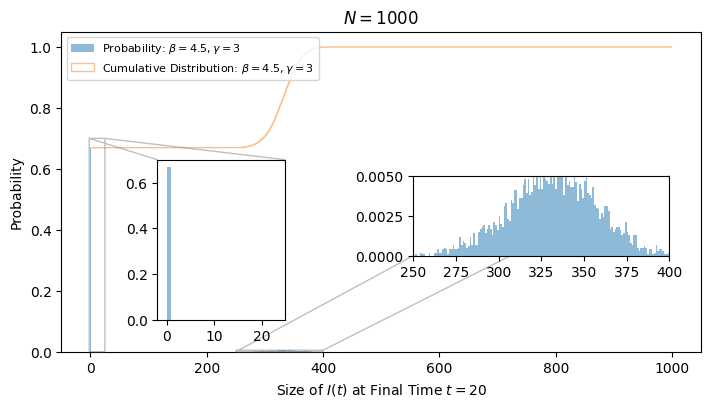

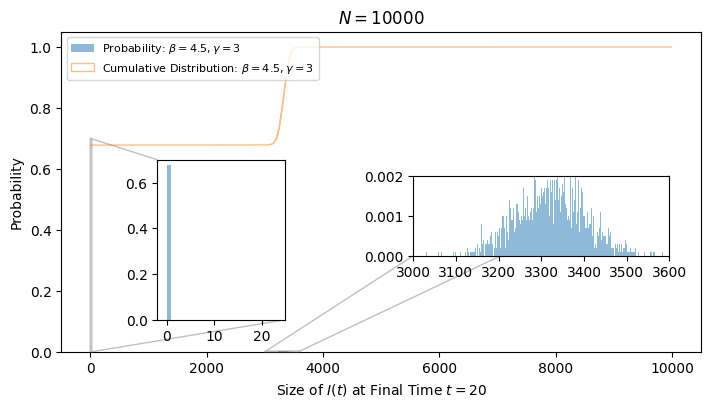

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from AMSI_2026_PGF_tools import Gillespie_SIS_model

def simulate_and_plot_SIS_final_size(N, R0=1.5, gammas=(3,), numsims = 10000, xlim1 = (-2,25), xlim2 = (200,400), ylim1=(0,0.7), ylim2 = (0,0.003), tmax=10):

    fig = plt.figure(figsize = (8,4))
    mainax = fig.add_axes([0.1,0.1,0.8,0.8])
    inset_ax1 = mainax.inset_axes([0.15,0.1,0.2,0.5], xlim=xlim1, ylim=ylim1)
    inset_ax2 = mainax.inset_axes([0.55,0.3,0.4,0.25], xlim=xlim2, ylim=ylim2)

    for gamma in gammas:
        beta = R0 * gamma
        I0 = 1
        final_sizes = []
        for _ in range(numsims):
            t, S, I = Gillespie_SIS_model(N-I0, I0, beta, gamma)
            final_sizes.append(I[-1])
        final_sizes = np.array(final_sizes)
        mainax.hist(final_sizes, bins=np.arange(N+1), density=True, alpha=0.5, label=f'Probability: $\\beta={beta}, \\gamma={gamma}$')
        mainax.hist(final_sizes, bins=np.arange(N+1), density=True, cumulative=True, alpha=0.5, histtype='step')
        inset_ax2.hist(final_sizes, bins = np.arange(N+1), density=True, alpha=0.5, label=f'$\\beta={beta}, \\gamma={gamma}$')
        inset_ax1.hist(final_sizes, bins = np.arange(N+1), density=True, alpha=0.5, label=f'$\\beta={beta}, \\gamma={gamma}$')


        #modifying cumulative dist plot followinghttps://stackoverflow.com/a/50711003/2966723
        poly = mainax.findobj(plt.Polygon)[-1] 
        vertices = poly.get_path().vertices

        # Keep everything above y == 0. You can define this mask however
        # you need, if you want to be more careful in your selection.
        keep = vertices[:, 1] > 0

        # Construct new polygon from these "good" vertices
        new_poly = plt.Polygon(vertices[keep], closed=False, fill=False,
                               edgecolor=poly.get_edgecolor(),
                               linewidth=poly.get_linewidth(), 
                               label = f'Cumulative Distribution: $\\beta={beta}, \\gamma={gamma}$')
        poly.set_visible(False)
        mainax.add_artist(new_poly)
        plt.draw()
    mainax.indicate_inset_zoom(inset_ax1)
    mainax.indicate_inset_zoom(inset_ax2)
    plt.xlabel('Size of $I(t)$ at Final Time $t={}$'.format(tmax))
    plt.ylabel('Probability')
    plt.legend(loc='upper left', fontsize=8)
    plt.title('$N={}$'.format(N))

simulate_and_plot_SIS_final_size(1000, numsims = 10000, xlim2=(250,400), ylim2=(0,0.005), tmax = 20)
simulate_and_plot_SIS_final_size(10000, numsims = 10000, xlim2=(3000,3600), ylim2=(0,0.002), tmax = 20)


We see that about $2/3$ of the outbreaks die out and have no infections remaining by $t=20$.  The other $1/3$ appear to be infecting close to $1/3$ of the population.

### Total size distribution of small SIS outbreaks 

Now let's look at the distribution of cumulative sizes of the small outbreaks.  We add a flag to the SIS simulation to return the cumulative number of infections, and we focus on outbreaks that end with fewer than $100$ total infections.

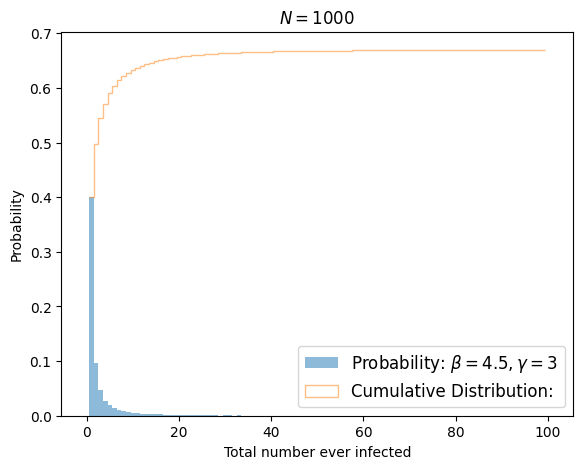

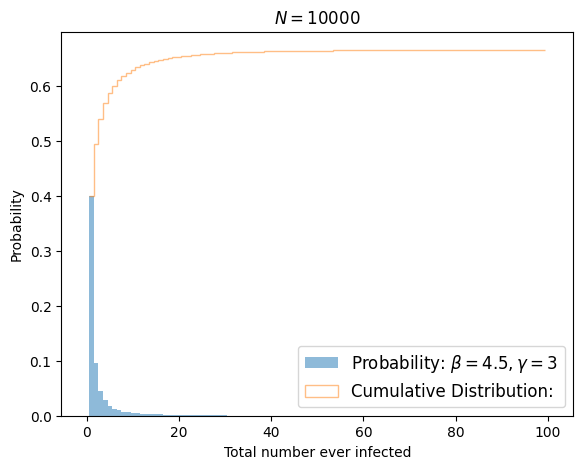

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from AMSI_2026_PGF_tools import Gillespie_SIS_model

def simulate_and_plot_SIS_cumulative_small_size(N, R0=1.5, gammas=(3,), numsims = 10000, xlim1 = (-2,25), xlim2 = (200,400), ylim1=(0,0.7), ylim2 = (0,0.003), tmax=4, threshold = 100):

    fig = plt.figure()
    mainax = fig.add_axes([0.1,0.1,0.8,0.8])
    #inset_ax1 = mainax.inset_axes([0.15,0.1,0.2,0.5], xlim=xlim1, ylim=ylim1)
    #inset_ax2 = mainax.inset_axes([0.55,0.3,0.4,0.25], xlim=xlim2, ylim=ylim2)

    for gamma in gammas:
        beta = R0 * gamma
        I0 = 1
        cumulative_sizes = []
        for _ in range(numsims):
            t, S, I, cumsize= Gillespie_SIS_model(N-I0, I0, beta, gamma, return_cumulative=True, tmax=tmax, cum_max=threshold+1)
            cumulative_sizes.append(cumsize[-1])
            
        cumulative_sizes = np.array(cumulative_sizes)

        # If I plot the cumulative distribution up to threshold, then it by default it
        # scales so that threshold is 1, even though many are larger than threshold.
        # The next few lines fix this.

        # build bins for probability mass including an overflow bin for > threshold
        bins_mass = np.concatenate((-0.5 + np.arange(threshold+1), [threshold + 0.5]))
        # build bins for cumulative plot only up to the threshold (no overflow)
        bins_cum = -0.5 + np.arange(threshold+1)

        # normalize by the total number of simulations so probabilities reflect the
        # fraction of all sims (not just those falling inside the plotted bins)
        weights = np.ones_like(cumulative_sizes) / cumulative_sizes.size

        # plot probability mass (includes overflow bin)
        mainax.hist(cumulative_sizes, bins=bins_mass, weights=weights, alpha=0.5,
                     label=f'Probability: $\\beta={beta}, \\gamma={gamma}$')

        # plot cumulative probability only up to threshold (so it plateaus at fraction <= 1)
        mainax.hist(cumulative_sizes, bins=bins_cum, weights=weights, cumulative=True, alpha=0.5, histtype='step')

        #modifying cumulative dist plot following https://stackoverflow.com/a/50711003/2966723
        poly = mainax.findobj(plt.Polygon)[-1] 
        vertices = poly.get_path().vertices

        # Keep everything above y == 0. You can define this mask however
        # you need, if you want to be more careful in your selection.
        keep = vertices[:, 1] > 0

        # Construct new polygon from these "good" vertices
        new_poly = plt.Polygon(vertices[keep], closed=False, fill=False,
                               edgecolor=poly.get_edgecolor(),
                               linewidth=poly.get_linewidth(), 
                               label = f'Cumulative Distribution:')
        poly.set_visible(False)
        mainax.add_artist(new_poly)
        plt.draw()
    plt.xlabel('Total number ever infected')
    plt.ylabel('Probability')
    plt.legend(loc='lower right', fontsize=12)
    plt.title('$N={}$'.format(N))

simulate_and_plot_SIS_cumulative_small_size(1000, numsims = 100000, tmax=float('inf'), threshold=100)
simulate_and_plot_SIS_cumulative_small_size(10000, numsims = 100000, tmax=float('inf'), threshold=100)

## Size distribution of small outbreaks

Looking at both SIS and SIR and both $N=1000$ and $N=10,000$, it should be clear that the total number of infections occuring in small outbreaks has the same distribution in all cases.

```{prf:theorem} Small outbreak size distribution ($N \to \infty$)
:label: theorem-LargeNSmallOutbreak

In the limit $N \to \infty$, $I(t)$ for small outbreaks of continuous-time SIS and SIR diseases is indistinguishable from $X(t)$ in continuous-time Galton-Watson processes with $r_0 = \gamma$ and $r_2 = \beta$.
```

```{prf:proof}

In the $N \to \infty$ limit, the probability that a transmission goes to an individual who is not susceptible goes to $0$.  As small outbreaks have a finite number of transmissions, we can assume that all transmissions go to susceptible individuals.

Then the transmission and recovery processes are identical.
```

Note that this theorem means that SIS and SIR are indistinguishable from each other for small outbreaks.

Our next goal is to find out what this size distribution is.


## Self-test

1. Look at the distribution of final sizes for SIR epidemics for different $N$.  You should see that the distribution of the proportion infected appears to get tighter as $N$ increases (in fact the width is roughly proportional to $1/\sqrt{N}$  as $N$ increases).  However, if we look at the number infected, we should see that it is getting wider.  Explain.

2. 